In [1]:
import os
import shutil

In [44]:
source_dir = "/kaggle/input/raf-db-dataset/DATASET"

# Define target directory
target_dir = "/kaggle/working/rafdb"

# Ensure target directories exist
os.makedirs(os.path.join(target_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(target_dir, "test"), exist_ok=True)

In [45]:
for i in range(1, 8):  
    os.makedirs(os.path.join(target_dir, "test", str(i)), exist_ok=True)

# Move CSV files
for file in ["train_labels.csv", "test_labels.csv"]:
    src_path = os.path.join(source_dir, file)
    dst_path = os.path.join(target_dir, file)
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)

# Move images to their respective folders (Assuming images have class-based naming)
for split in ["train", "test"]:
    split_path = os.path.join(source_dir, split)
    if os.path.exists(split_path):
        for file in os.listdir(split_path):
            if file.endswith((".jpg", ".png")):  # Adjust extensions as needed
                class_label = file.split("_")[0]  # Assuming class is in filename
                target_path = os.path.join(target_dir, split, class_label)
                os.makedirs(target_path, exist_ok=True)
                shutil.move(os.path.join(split_path, file), os.path.join(target_path, file))

print("Dataset organized successfully!")

Dataset organized successfully!


In [46]:
import cv2

image_path = "/kaggle/input/raf-db-dataset/DATASET/test/1/test_0004_aligned.jpg"
img = cv2.imread(image_path)  # Load the image
height, width, channels = img.shape  # Get dimensions

print(f"Width: {width}, Height: {height}, Channels: {channels}")

Width: 100, Height: 100, Channels: 3


In [47]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [48]:
train_dir = os.path.join(target_dir, "train")
test_dir = os.path.join(target_dir, "test")

In [49]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, horizontal_flip=True, validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

num_classes = len(train_generator.class_indices)

Found 28000 images belonging to 7 classes.
Found 7000 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.


In [2]:
import os
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [19]:
base_dir = "/kaggle/input/raf-db-dataset"  # Base directory (where CSV files are)
source_dir = os.path.join(base_dir, "DATASET")  # Image source directory
target_dir = "/kaggle/working/rafdb"  # Destination for structured dataset

image_size = (100, 100)  
batch_size = 64

# ✅ Create necessary directories
for split in ["train", "test"]:
    for i in range(1, 8):  # Class labels 1 to 7
        os.makedirs(os.path.join(target_dir, split, str(i)), exist_ok=True)

# ✅ Load CSV files (Fixed paths)
train_df = pd.read_csv(os.path.join(base_dir, "train_labels.csv"))
test_df = pd.read_csv(os.path.join(base_dir, "test_labels.csv"))

In [4]:
def organize_images(df, split):
    for _, row in df.iterrows():
        img_name = row[0]  
        label = str(row[1]) 

        img_path = os.path.join(source_dir, split, label, img_name)  
        dest_path = os.path.join(target_dir, split, label, img_name)

        if os.path.exists(img_path):
            shutil.copy(img_path, dest_path)
            # print(f"✅ Copied {img_name} -> {dest_path}")
        else:
            print(f"❌ Image not found: {img_path}")

# ✅ Run image organization
organize_images(train_df, "train")
organize_images(test_df, "test")

print("✅ Dataset organized successfully!")

<ipython-input-4-7658fa96fe94>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_name = row[0]
<ipython-input-4-7658fa96fe94>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = str(row[1])


✅ Dataset organized successfully!


In [5]:
print(os.listdir(os.path.join(target_dir, "train", "1"))[:10])  # Should list images

['train_05797_aligned.jpg', 'train_03818_aligned.jpg', 'train_00856_aligned.jpg', 'train_01536_aligned.jpg', 'train_05848_aligned.jpg', 'train_06344_aligned.jpg', 'train_08056_aligned.jpg', 'train_01174_aligned.jpg', 'train_07180_aligned.jpg', 'train_02733_aligned.jpg']


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,   # Adjust channel values
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# ✅ Improved Data Generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, "train"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, "train"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(target_dir, "test"),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

print("✅ Data Generators Ready!")

Found 28000 images belonging to 7 classes.
Found 7000 images belonging to 7 classes.
Found 3068 images belonging to 7 classes.
✅ Data Generators Ready!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


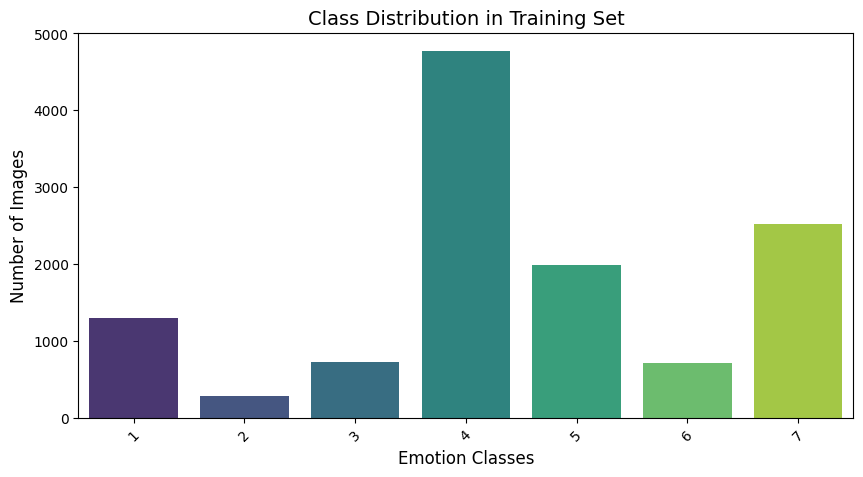

1: 1290 images
2: 281 images
3: 717 images
4: 4772 images
5: 1982 images
6: 705 images
7: 2524 images


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get class labels and initialize dictionary
class_labels = list(train_generator.class_indices.keys())  # Class names
class_counts = {label: 0 for label in class_labels}  # Dictionary to store counts

# Count the number of images in each class (training data)
for class_label in class_labels:
    class_dir = os.path.join(target_dir, "train", class_label)
    class_counts[class_label] = len(os.listdir(class_dir))

# ✅ Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")

# ✅ Labels and Title
plt.xlabel("Emotion Classes", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Class Distribution in Training Set", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels

# ✅ Show plot
plt.show()

# ✅ Print class-wise count
for label, count in class_counts.items():
    print(f"{label}: {count} images")

In [8]:
import os
import shutil
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Augmentation settings
datagen = ImageDataGenerator(
    brightness_range=[0.8, 1.2],  # Random brightness
    horizontal_flip=True,
    rotation_range=30,  # Rotate up to 30 degrees
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zoom
    fill_mode='nearest'  # Fill missing pixels
)

def augment_class_images(class_folder, target_count):
    """
    Augments images in a class folder until the target count is reached.

    Args:
        class_folder (str): Path to the class folder containing images.
        target_count (int): Number of images required per class.
    """
    # Get all image files in the class folder
    images = [img for img in os.listdir(class_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]
    current_count = len(images)

    if current_count >= target_count:
        print(f"✅ Class {os.path.basename(class_folder)} already has {current_count} images.")
        return
    
    print(f"🚀 Augmenting class {os.path.basename(class_folder)}: {current_count} ➝ {target_count}")

    # Generate new images
    i = 0
    while current_count < target_count:
        img_name = images[i % len(images)]  # Cycle through existing images
        img_path = os.path.join(class_folder, img_name)
        
        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Generate augmented image
        aug_iter = datagen.flow(img, batch_size=1)
        aug_img = next(aug_iter)[0].astype(np.uint8)

        # Save new image
        aug_name = f"aug_{current_count}.jpg"
        cv2.imwrite(os.path.join(class_folder, aug_name), cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))

        current_count += 1
        i += 1  # Move to next image

    print(f"✅ Augmentation complete for {os.path.basename(class_folder)}!")

# ✅ Define dataset path
dataset_dir = "/kaggle/working/rafdb/train"  # Update this to your actual dataset path

# ✅ Augment each class to 5000 images
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        augment_class_images(class_path, target_count=5000)

print("🎯 Dataset balancing complete!")

🚀 Augmenting class 4: 4772 ➝ 5000
✅ Augmentation complete for 4!
🚀 Augmenting class 6: 705 ➝ 5000
✅ Augmentation complete for 6!
🚀 Augmenting class 5: 1982 ➝ 5000
✅ Augmentation complete for 5!
🚀 Augmenting class 2: 281 ➝ 5000
✅ Augmentation complete for 2!
🚀 Augmenting class 3: 717 ➝ 5000
✅ Augmentation complete for 3!
🚀 Augmenting class 7: 2524 ➝ 5000
✅ Augmentation complete for 7!
🚀 Augmenting class 1: 1290 ➝ 5000
✅ Augmentation complete for 1!
🎯 Dataset balancing complete!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


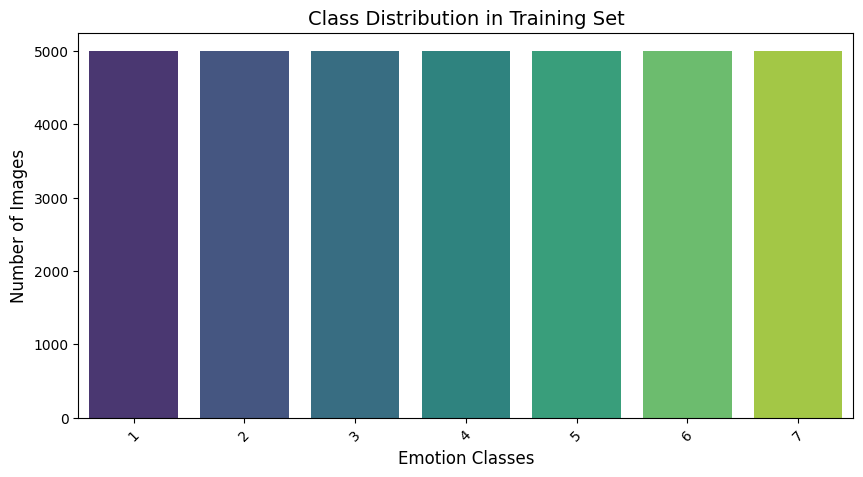

1: 5000 images
2: 5000 images
3: 5000 images
4: 5000 images
5: 5000 images
6: 5000 images
7: 5000 images


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get class labels and initialize dictionary
class_labels = list(train_generator.class_indices.keys())  # Class names
class_counts = {label: 0 for label in class_labels}  # Dictionary to store counts

# Count the number of images in each class (training data)
for class_label in class_labels:
    class_dir = os.path.join(target_dir, "train", class_label)
    class_counts[class_label] = len(os.listdir(class_dir))

# ✅ Plot class distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")

# ✅ Labels and Title
plt.xlabel("Emotion Classes", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Class Distribution in Training Set", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels

# ✅ Show plot
plt.show()

# ✅ Print class-wise count
for label, count in class_counts.items():
    print(f"{label}: {count} images")

In [21]:
# ✅ Callback functions
def get_callbacks(model_name):
    return [
         ModelCheckpoint(filepath=f'model.{model_name}.keras', verbose=1, monitor='val_accuracy', mode='max', save_best_only=True),
        # ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1),
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
    ]

In [36]:
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

# Number of classes
classes = 7

#from tensorflow.keras import layers 
base_model = DenseNet121(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
base_model.trainable = True  # Allow fine-tuning

# Add custom classification layers
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.BatchNormalization()(x)
# Increase L2 regularization and add more dropout
x = layers.Dense(256, activation='relu', 
                kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.Dropout(0.5)(x)  # Increased dropout rate
# Add another regularized layer
x = layers.Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(classes, activation='softmax')(x)

model_DenseNet121 = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model_DenseNet121.compile(
    optimizer=Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
# model_DenseNet121.summary()

In [37]:
from tensorflow.keras.callbacks import *
callbacks = get_callbacks('DenseNet121')

In [38]:
history_DenseNet121 = model_DenseNet121.fit(
    x=train_generator,
    # steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    # validation_steps=len(val_generator),
    epochs=100,  # Increase epochs to allow proper learning
    batch_size=64,  
    callbacks=callbacks
)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.1884 - loss: 2.6703
Epoch 1: val_accuracy improved from -inf to 0.39543, saving model to model.DenseNet121.keras
438/438 ━━━━━━━━━━━━━━━━━━━━ 312s 450ms/step - accuracy: 0.1885 - loss: 2.6698 - val_accuracy: 0.3954 - val_loss: 1.8751
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.3344 - loss: 2.0298
Epoch 2: val_accuracy improved from 0.39543 to 0.48857, saving model to model.DenseNet121.keras
438/438 ━━━━━━━━━━━━━━━━━━━━ 137s 308ms/step - accuracy: 0.3344 - loss: 2.0296 - val_accuracy: 0.4886 - val_loss: 1.6516
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.4564 - loss: 1.7238
Epoch 3: val_accuracy improved from 0.48857 to 0.56157, saving model to model.DenseNet121.keras
438/438 ━━━━━━━━━━━━━━━━━━━━ 135s 303ms/step - accuracy: 0.4565 - loss: 1.7237 - val_accuracy: 0.5616 - val_loss: 1.4657
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.5470 - loss: 1.4

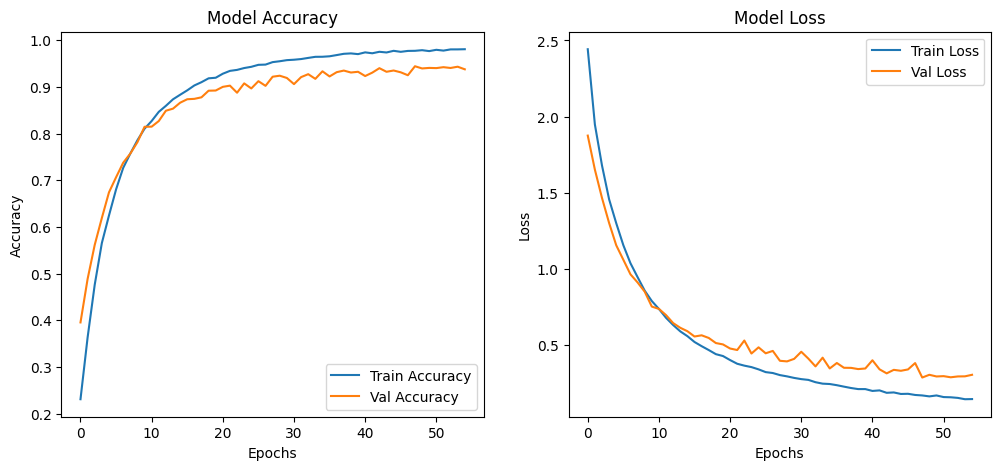

In [39]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history_DenseNet121)

In [40]:
test_loss, test_acc = model_DenseNet121.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.8066 - loss: 1.1122
Test Accuracy: 81.26%


In [41]:
model_DenseNet121.save("rafdb_face_recognition.keras")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)  # Output layer

# Create final model
model = Model(inputs=base_model.input, outputs=x)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)